
## Question 1
$\frac{\pi_i \mathcal{N}(x ; \mu_i , \Sigma_i))}{\Sigma_{j=1}^{K}\pi_j \mathcal{N}(x ; \mu_j , \Sigma_j)} = \exp( \log(\pi_i \mathcal{N}(x ; \mu_i , \Sigma_i)) - \log(\Sigma_{j=1}^{K}\pi_j \mathcal{N}(x ; \mu_j , \Sigma_j)))$ 

$= \exp ( \log ( \pi_i ) + \log( \mathcal{N} (x ; \mu_i , \Sigma_i ) )  - \log ( \Sigma_{j=1}^{K} \pi_j \mathcal{N} ( x ; \mu_j , \Sigma_j ) ) )$


With $\mathcal{N}(x ; \mu , \Sigma)) = (2\pi)^{-\frac{k}{2}}\det(\Sigma)^{\frac{1}{2}}\exp(\frac{1}{2}(x - \mu)^T \Sigma^{-1} (x-\mu))$

$= \exp ( \log ( \pi_i ) + \log( (2\pi)^{-\frac{k}{2}}\det(\Sigma_i)^{\frac{1}{2}}\exp(\frac{1}{2}(x - \mu_i)^T {\Sigma_i}^{-1} (x-\mu_i)) )  - \log ( \Sigma_{j=1}^{K} \pi_j (2\pi)^{-\frac{k}{2}}\det(\Sigma_j)^{\frac{1}{2}}\exp(\frac{1}{2}(x - \mu_j)^T {\Sigma_j}^{-1} (x-\mu_j)) ) )$

$= \exp ( \log ( \pi_i ) -\frac{k}{2}\log(2\pi) + {\frac{1}{2}}\log( \det(\Sigma_i)) + (\frac{1}{2}(x - \mu_i)^T {\Sigma_i}^{-1} (x-\mu_i)) )  - \log ( \Sigma_{j=1}^{K} \pi_j (2\pi)^{-\frac{k}{2}}\det(\Sigma_j)^{\frac{1}{2}}\exp(\frac{1}{2}(x - \mu_j)^T {\Sigma_j}^{-1} (x-\mu_j)) ) )$

We have: $l_i =  \log ( \pi_i ) -\frac{k}{2}\log(2\pi) + {\frac{1}{2}}\log( \det(\Sigma_i)) + (\frac{1}{2}(x - \mu_i)^T {\Sigma_i}^{-1} (x-\mu_i)) ) $ but we have $ \det(\Sigma_i) = \Pi {\lambda_i}^k$ where $\{ {\lambda_i}^k \}_k$ are the eigen values of $ \Sigma_i $  

Choleski??

## Question 2

$$ \nabla_{\mu_i}L_t(\theta) = ? $$

$L_t(\mu + h, \theta) = \Sigma_{n=1}^{N} \Sigma_{i=1}^{K} \gamma_{i}^{(t)} (x_n) (\frac{1}{2}\log |\Sigma_i| - \frac{1}{2}(x_n - \mu_i - h)^T \Sigma_{i}^{-1} (x_n - \mu_i - h) ) + cste$

$(x_n - \mu_i - h)^T \Sigma_{i}^{-1} (x_n - \mu_i - h) = ((x_n - \mu_i)^T - h^T) [\Sigma_{i}^{-1} (x_n - \mu_i) -\Sigma_{i}^{-1} h)]$

$ = (x_n - \mu_i)^T \Sigma_{i}^{-1}  (x_n - \mu_i) - h^T \Sigma_{i}^{-1} (x_n - \mu_i) - (x_n - \mu_i)^T \Sigma_{i}^{-1} h + h^T  \Sigma_{i}^{-1} h - 2 (x_n - \mu_i)^T \Sigma_{i}^{-1} h $ 

$$ \nabla_{\mu_i}L_t(\theta) = \Sigma_{n=1}^{N} \gamma_{i}^{(t)} (x_n - \mu_i)^T \Sigma_{i}^{-1}$$


$$ \nabla_{\Sigma_i}L_t(\theta) = ? $$

$L_t(\Sigma + H, \theta) = \Sigma_{n=1}^{N} \Sigma_{i=1}^{K} \gamma_{i}^{(t)}(x_n) [ - \frac{1}{2} \log |\Sigma_i + H| - \frac{1}{2}  (x_n - \mu_i)^T (\Sigma_i + H)^{-1}(x_n - \mu_i))] $

c.f. feuille Margaux

## Question 3
1. First we generate some synthetic data

In [1]:
# Imports
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [1]:
# Parameters
N = 1000
K = 3
pis = [0.3, 0.2, 0.5]
mus = [[0, 0], [1, 2], [2, 0]]
sigmas = [
    [[1.00, -0.25],
     [-0.25, 0.50]], 
    [[0.50, 0.25],
     [ 0.25, 0.50]], 
    [[0.50, -0.25],
     [-0.25, 1]]]
assert K == len(pis) == len(mus) == len(sigmas)
assert sum(pis) == 1
assert len(sigmas)[0] == len(sigmas)[0][0] == len(mus[0]) # Must be checked for all i,j

In [2]:
# Data generation
gmm_sample = np.zeros((N, len(mus[0])))  # Initialisation
xis = np.random.multinomial(1, pis, size=N)  # To which gaussian do we belong
xis = np.array(xis, dtype=bool)
for gaussian_idx in range(K):
    gmm_sample[xis[:,gaussian_idx]] = np.random.multivariate_normal(
        mean=mus[gaussian_idx], cov=sigmas[gaussian_idx], size=N)[xis[:,gaussian_idx]]

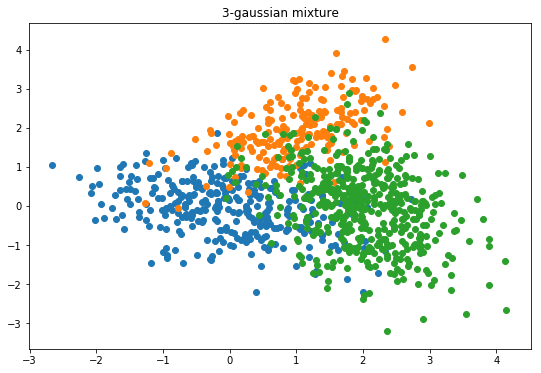

In [7]:
# Plot generated data
plt.figure(figsize=(9,6))
plt.plot()
plt.title("{}-gaussian mixture".format(K))
for gaussian_idx in range(K):
    plt.scatter(gmm_sample[:,0][xis[:,gaussian_idx]], gmm_sample[:,1][xis[:,gaussian_idx]])
plt.show()
plt.close()

In [61]:
"""

K mixtures
N samples
d dimension of the samples

"""


def M_step(data, data_membership_weights):
    """
    Maximization step
    We try to maximize the parameters given the weights w_ij
    data_membership_weights: R^{N*K}
    membership_weights: R^{K}
    """
    # Simple variables for computations
    membership_weights = data_membership_weights.mean(axis=0)  # pi_k
    K = len(membership_weights)
    d = len(data[0])
    N = len(data)
    
    # TODO: Needs the gradients
    means = np.zeros(dim=(membership_weights.shape[1], data.shape[1]))   
    return None

def E_step(data, means, covariances, data_membership_weights):
    """
    Estimation step
    We compute w_ij given the current parameters
    means: R^{K*d}
    covariances: R^{K*d*d}
    data_membership_weights: R^{N*K}
    membership_weights: R^{K}
    """
    # Simple variables for computations
    membership_weights = data_membership_weights.mean(axis=0)  # pi_k
    K = len(membership_weights)
    d = len(data[0])
    N = len(data)
    
    # Initialisation of the weights
    new_data_membership_weights = np.zeros((data.shape[0], means.shape[1]))
    # TODO: Change det to https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.slogdet.html#numpy.linalg.slogdet
    
    log_gamma = np.log(membership_weights) - (d/2)*np.log(np.pi / 2) + (1/2)*np.log(np.linalg.det(covariances))
   
    middles = [
        np.vectorize(lambda x : np.transpose(x - means[i]) @ covariances[i] @ (x - means[i]) / 2)
        for i in range(len(means))
    ]
    
    middles_results = np.array([middles[i](data) for i in range(len(means))])
    
    
    normalizing_const = None
    
    return log_gamma, middles_results, normalizing_const

def EM():
    """
    EM Algorithm
    """
    return None

In [62]:
x = np.ones((1000, 2))

In [63]:
E_step(data=gmm_sample,
       means=np.array(mus), 
       covariances=np.array(sigmas),
       data_membership_weights=np.ones((1000, 3))/3)

(array([-1.96353428, -2.38718321, -1.96353428]),
 array([[[2.35924316, 0.93248933],
         [2.23242706, 0.88010561],
         [2.59563067, 2.43275724],
         ...,
         [0.91022269, 1.57255203],
         [2.88183663, 0.888772  ],
         [1.68080468, 0.94179825]],
 
        [[2.35924316, 0.93248933],
         [2.23242706, 0.88010561],
         [2.59563067, 2.43275724],
         ...,
         [0.91022269, 1.57255203],
         [2.88183663, 0.888772  ],
         [1.68080468, 0.94179825]],
 
        [[2.35924316, 0.93248933],
         [2.23242706, 0.88010561],
         [2.59563067, 2.43275724],
         ...,
         [0.91022269, 1.57255203],
         [2.88183663, 0.888772  ],
         [1.68080468, 0.94179825]]]),
 None)

In [64]:
x1, x2, x3 = _

In [66]:
x2.shape

(3, 1000, 2)

In [60]:
np.array(mus).shape

(3, 2)

In [50]:
def fun(x):
    return 4 

In [51]:
x=np.ones((3,5))